**Instructions.** In this practical, you will be guided to apply what you learn about regression, classification and clustering to some datasets. We provide more detailed explanations for some of the concepts introduced in lecture, and introduce some new concepts. This notebook also introduces and illustrates some useful R libraries for regression, classification and clustering. You will find some problems that you need to solve throughout the notebook. Place your answers in the cell below the problems, and you may add new cells if needed. Make sure your code is included in your answers.

You may find it helpful to read through the whole notebook and learn from the examples first, before solving the problems.

# Statistical Learning

## Supervised Learning

### Linear Regression

Let's load up Karl Pearsons' data on the heights (in inches) of fathers and their sons, produce a scatter plot of the data, and display standard summary statistics.

In [1]:
dev.new(width=5, height=4) # set the figure size to be 5in x 4in

    fheight         sheight     
 Min.   :59.00   Min.   :58.50  
 1st Qu.:65.80   1st Qu.:66.90  
 Median :67.80   Median :68.60  
 Mean   :67.69   Mean   :68.68  
 3rd Qu.:69.60   3rd Qu.:70.50  
 Max.   :75.40   Max.   :78.40  

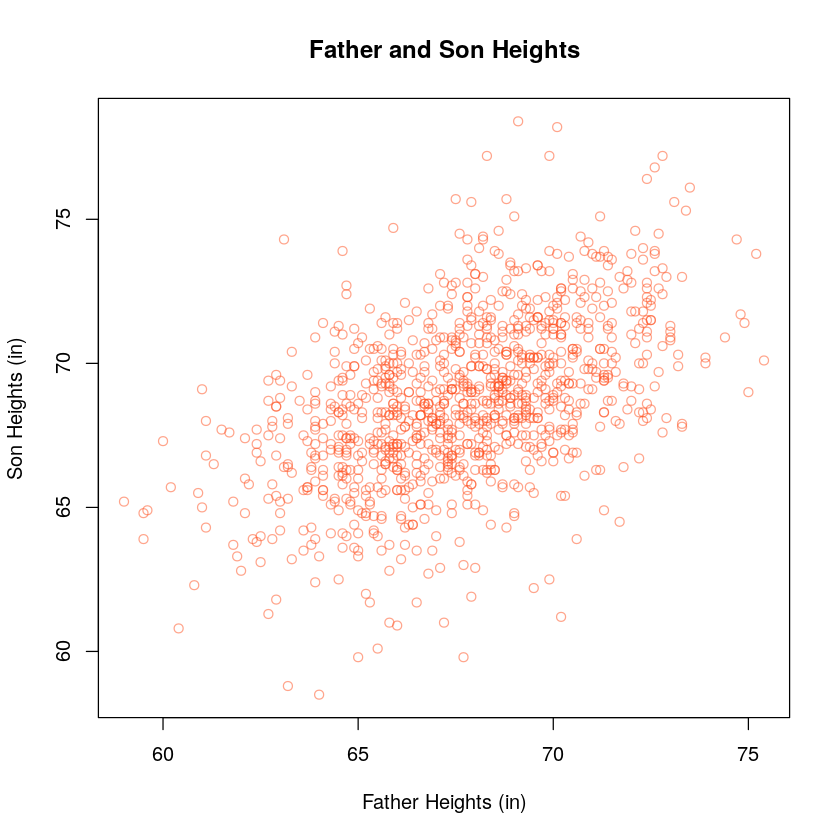

In [2]:
library("readr")
fheight<-read_csv("./PearsonFather.csv",col_names="fheight",col_types="d")
sheight<-read_csv("./PearsonSon.csv",col_names="sheight",col_types="d")
fs_height<-data.frame(fheight,sheight)
plot(fs_height$fheight,fs_height$sheight,main="Father and Son Heights", xlab="Father Heights (in)",ylab="Son Heights (in)",col=rgb(1,0.3,0.1,0.5))
summary(fs_height)

**Fitting a linear model.**
We will fit a linear regression model to this data using the built-in `lm` function, with Father Heights (in) as the predictor, and Son Heights (in) as the response. The following illustrates how this can be done. You can learn more about the function by running `help(lm)` to read the function's documentation. 

In [3]:
lmfit<-with(fs_height,lm(sheight~fheight))
summary(lmfit)


Call:
lm(formula = sheight ~ fheight)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8910 -1.5361 -0.0092  1.6359  8.9894 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.89280    1.83289   18.49   <2e-16 ***
fheight      0.51401    0.02706   19.00   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.438 on 1076 degrees of freedom
Multiple R-squared:  0.2512,	Adjusted R-squared:  0.2505 
F-statistic: 360.9 on 1 and 1076 DF,  p-value: < 2.2e-16


The summary information contains key information about the estimated model, including those that we covered in lecture.

|<center>TASK</center>|
| ---- |
| Write down the estimated relationship between son heights and father height (exclude the error term). Describe how father height affect son height.|

---
**Solution**

Based on the output of the summary function, we have `sheight = 0.51401 * fheight + 33.89280`.

The model suggests that for every unit (1 inch) increase in fheight, we would expect a 0.514 inch increase in sheight. The intercept suggests for a hypothetical fheight of 0 inch, sheight is 33.89 inch - of course, this does not make sense in practice, and indicates that the model can only be applicable for reasonable values of fheight.

---

**Checking model assumptions.**
Before taking the model seriously, we need to check whether the assumptions on our error model are satisfied. 

To do so, we need to explore the model's *residuals*, i.e., the differences between the actual values and the predicted values, or more precisely, the values of $y - \beta_{0} - \beta_{1} x$ for a simple linear model.

The assumption that we make on the residuals can be broken down into three assumptions
(1) zero mean; (2) constant variance, or homoscedasticity; and (3) normality.

Let's first extract the residuals, plot them, and compute summary statistics.

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-8.891001 -1.536099 -0.009209  0.000000  1.635924  8.989391 

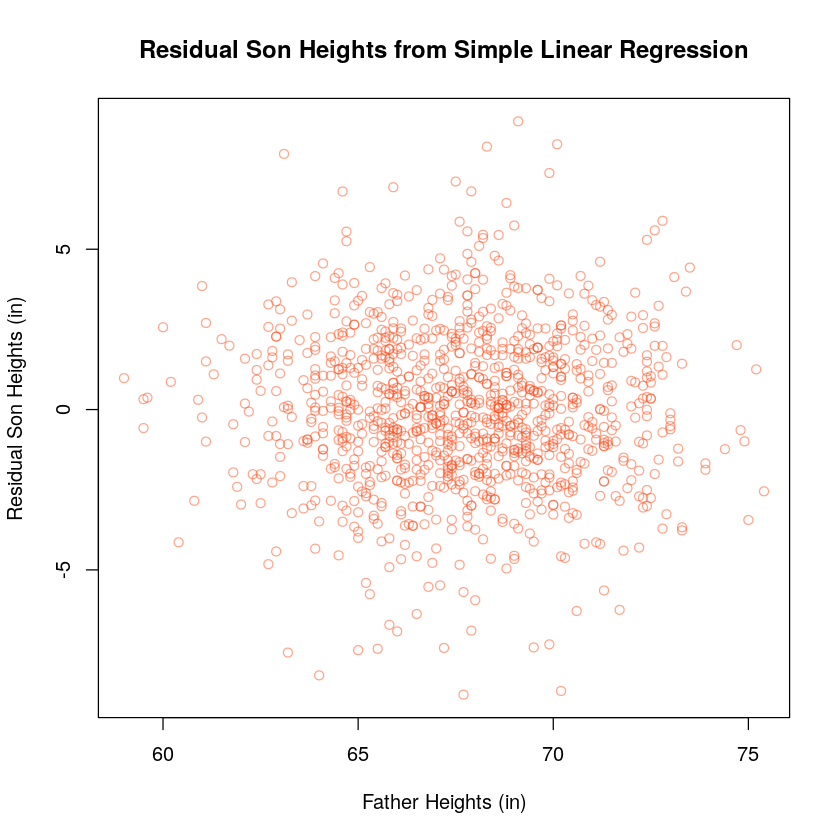

In [4]:
lmfit.res<-resid(lmfit)
plot(fs_height$fheight,lmfit.res,
     main="Residual Son Heights from Simple Linear Regression", 
     xlab="Father Heights (in)",
     ylab="Residual Son Heights (in)",
     col=rgb(1,0.3,0.1,0.5))
summary(lmfit.res)

By examining the plot above, Assumption (1) seems reasonable.  Assumption (2) seems to hold for Father Heights in the range from about 63 in to 71 in.  Outside this range, there may be some *heteroscedasticity* (change in the variability).  However, it is relatively mild, and we will proceed as though this assumption is satistfied.

To check Assumption (3), we will create a quantile-quantile (Q-Q) plot of the empirical distribution of the residuals against the standard normal distribution. A Q-Q plot for two distributions is a plot of the quantiles of one distribution against those of another. From a practical point of view, it is sufficient to know that if the residuals come from a normal distribution, the points in the Q-Q plot should approximately lie on a straight line. For those interested in better understanding the Q-Q plot, the Wikipedia article on Q-Q plot is a good reference: https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot.

A Q-Q plot can be conveniently generated in R using the `qqPlot` function from the `car` library. It allows us to generate the Q-Q plot together with a straight-line fit and pointwise 95% confidence intervals.

Loading required package: carData



[1]  851 1073

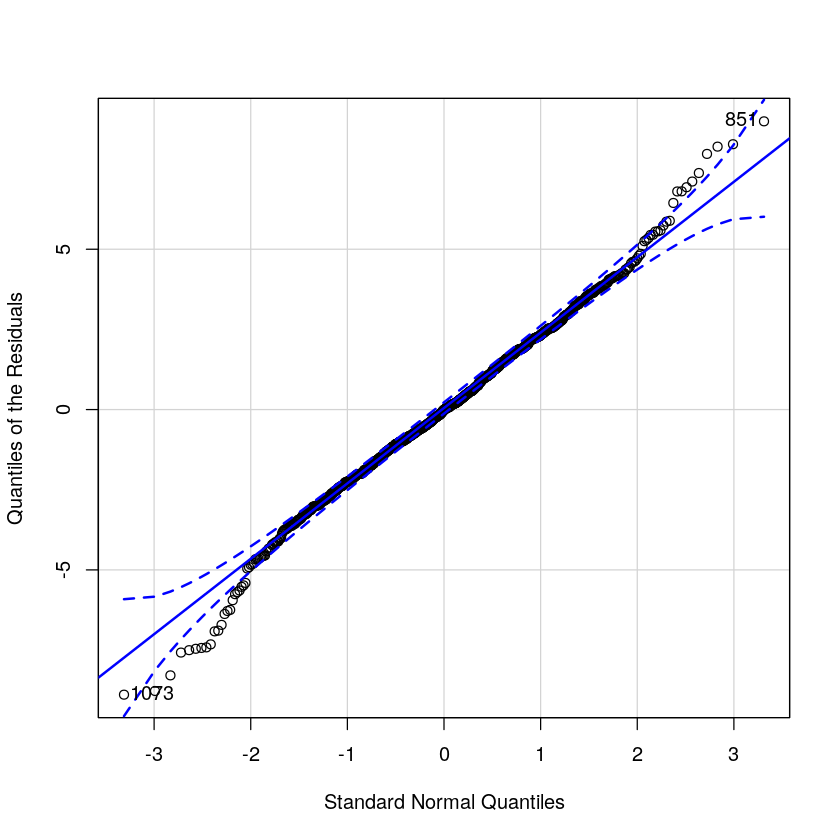

In [5]:
library("car")
qqPlot(lmfit.res,xlab="Standard Normal Quantiles",ylab="Quantiles of the Residuals")

As we can see from the plot, the bulk of the residual quantiles appear to follow a normal distribution, with slightly heavier left and right *tails*, suggesting a mild departure from the Assumption (3).

Besides using the Q-Q plot as a graphical test for Assumption (3), we can also formally test it by carrying out a Shapiro-Wilk test. The Shapiro-Wilk test computes a summary statistic $W$ from the residuals, and then computes the  whether probability (p-value) of observing the value of $W$ assuming the *null hypothesis* that the data come from a normal distribution. A small p-value indicates that something unusual happens if the null hypothesis is true, and thus we consider the null hypothesis unlikely.

In [6]:
shapiro.test(lmfit.res)


	Shapiro-Wilk normality test

data:  lmfit.res
W = 0.993, p-value = 5.679e-05


Since the p-value is very small, we reject the null hypothesis in favour of the alternative hypothesis that the data do not come from a normal distribution. This is in line with our Q-Q plot suspicion. What this implies is that strictly speaking, any further statistical test should be taken with a grain of salt. At the same time, note that the violation of the normality assumption appears to be mild (subjectively), and we may still proceed to take the model seriously for further analysis.

**Goodness of fit.**
Now, let's return to the model summary.

In [7]:
summary(lmfit)


Call:
lm(formula = sheight ~ fheight)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8910 -1.5361 -0.0092  1.6359  8.9894 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.89280    1.83289   18.49   <2e-16 ***
fheight      0.51401    0.02706   19.00   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.438 on 1076 degrees of freedom
Multiple R-squared:  0.2512,	Adjusted R-squared:  0.2505 
F-statistic: 360.9 on 1 and 1076 DF,  p-value: < 2.2e-16


Because the p-values for both intercept and fheight are extremely small, this suggests that they are unlikely to be equal to zero.  

|<center>TASK</center>|
| ---- |
| What is the interpretation of the R-squared value of 0.2512? |

---
**Solution**

R-squared measures the proportion of variability in sheight that can be explained using fheight. For a linear model fitted on a training set, its R-squared value on the training data is betwen 0 and 1, with 0 indicating that no variability in the response is explained, and 1 indicating that all variability in the response has been explained by the regression. R-squared=0.2512 suggests the predictor fheight is explaining only ~25% of the variability in sheight.

As an aside, R-squared is not always in the range of 0 and 1. For those interested, see more about R-squared at https://en.wikipedia.org/wiki/Coefficient_of_determination.

---

**Uncertainty in model parameters.**
The estimated parameters are random, because they are computed from a random sample from a simple linear model. If the data is indeed generated by a simple linear model, then when the sample size is large, the estimated parameters will be close to the true parameters. The confidence interval (CI) is often used as a way to describe how accurate the estimates are. A CI with confidence level $p$ is an interval that has probability $p$ of containing the true value. Be very careful when interpreting this statement: here the true value is unknown but fixed, and the CI is random (due to randomness in the sample). The statement thus means that if we use the same procedure to construct a level $p$ CI on many many samples, a fraction $p$ of the intervals will contain the true value.

In R, the `confint` function can be used to obtain confidence intervals. By default, a 95% confidence interval is returned.

In [8]:
confint(lmfit)

,2.5 %,97.5 %
(Intercept),30.2963477,37.489253
fheight,0.4609158,0.567096


Thus a 95% CI for the intercept is [30.2963477, 37.489253], and a 95% CI for fheight is [0.4609158, 0.567096]. It should be emphasized that once the CIs have been calculated, the true parameters are either in the intervals or not. What we can say is that a larger CI indicates higher uncertainty in the estimate.

**Predition.**
We can use the fitted linear model to make predictions on data. Such predictions are uncertain as well, and 
we can construct confidence intervals for the predictions to quantify our degree of uncertainty in the prediction. If the estimated linear equation is $y = \hat{\beta}_{0} + \hat{\beta}_{1} x$, then given any $x$, we can simply use the RHS as a point estimate. This can be done using the `predict` function as illustrated below.

In [9]:
predict(lmfit, data.frame(fheight=67))

1 
68.3312

Note that if you want to read the documentation of the `predict` function, you need to type `help(predict.lm)` in this case.

|<center>TASK</center>|
| ---- |
| Manually calculate the fitted linear model's predicted sheight given fheight=67 in (use a calculator if needed). Show your working.|

---
**Solution**

The predicted sheight is 33.89280 + 0.51401*67 = 68.33147.

The difference between the manually calculated prediction and the prediction given by the `predict` function is because the parameter estimates used have been rounded. We can obtain the same value using `coef(lmfit)['(Intercept)'] + coef(lmfit)['fheight']*67`. 

---

The point prediction above is generally different from the true value due to two sources of randomness: (a) the estimated parameters are random and only approximate; (b) the simple linear model has an error term. 

When we consider the uncertainty in the prediction, we may only consider (a), or consider both (a) and (b). If we consider only (a), we can construct a confidence interval for $\hat{\beta}_{0} + \hat{\beta}_{1} x$ - while the distribution of this prediction has a very complex form, we can again use the `predict` function to help us to obtain a CI. A 95% CI for sheight when fheight=67 in is given below.

In [10]:
predict(lmfit,data.frame(fheight=67),interval="confidence",level = 0.95,type="response")

,fit,lwr,upr
1,68.3312,68.18099,68.4814


Now, let's construct a plot of the data, the fitted regression line, and a pointwise 95% confidence interval for the regression line.

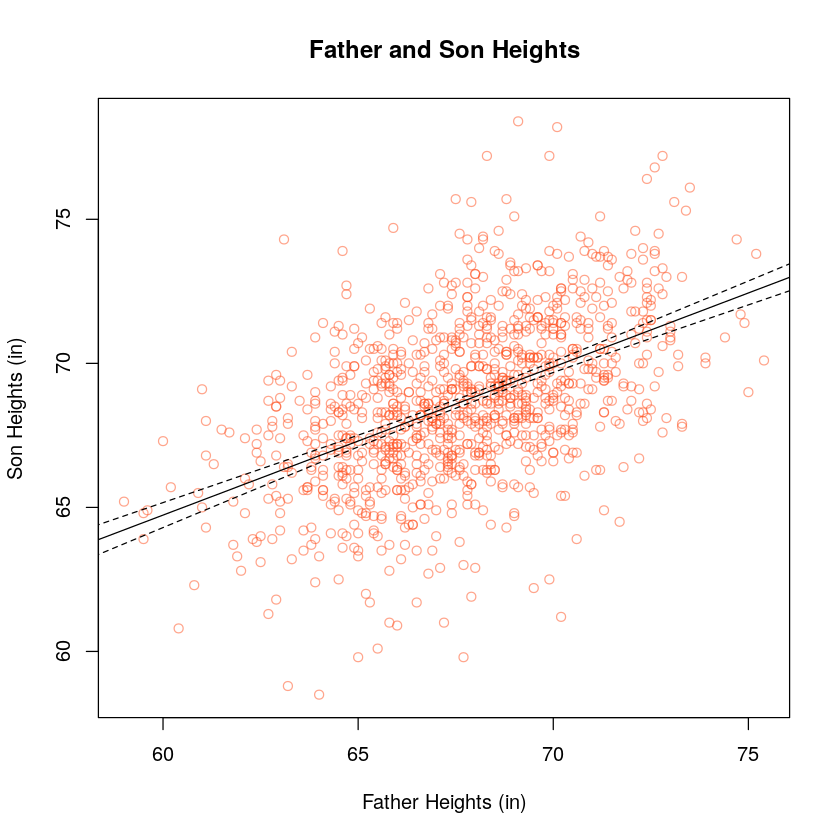

In [11]:
newfheight<-seq(min(fheight$fheight)-1, max(fheight$fheight)+1, by=0.1)
lmfitci<-predict(lmfit,data.frame(fheight=newfheight),interval="confidence",level = 0.95,type="response")
plot(fs_height$fheight,fs_height$sheight,main="Father and Son Heights", xlab="Father Heights (in)",ylab="Son Heights (in)",col=rgb(1,0.3,0.1,0.5))
lines(newfheight,lmfitci[,1],col="black",lty=1)
lines(newfheight,lmfitci[,2],col="black",lty=2)
lines(newfheight,lmfitci[,3],col="black",lty=2)

Frequently, we are often interested to take both the uncertainty in the parameter estimates and the uncertainty due to the error term into account, and produce an interval that captures both forms of uncertainty. This would give us the typical range of responses be for a particular predictor value.

Such interval is called a *prediction interval*.  Let's construct a 95% prediction interval for a predictor of 67 in.

In [12]:
predict(lmfit,data.frame(fheight=67),interval="predict",level=0.95,type="response")

,fit,lwr,upr
1,68.3312,63.5448,73.11759


You will notice immediately that this interval is significantly wider than the confidence interval we computed earlier.

|<center>TASK</center>|
| ---- |
| Construct a plot of the data, the fitted regression line, and a pointwise 95% prediction interval for the regression line.|

---
**Solution**

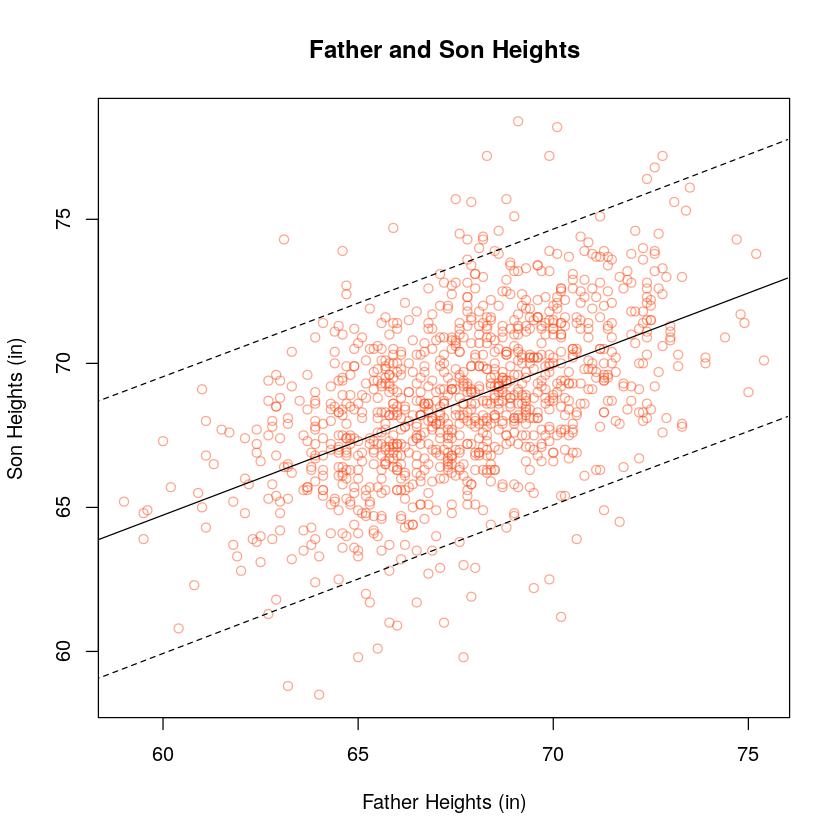

In [13]:
newfheight<-seq(58,76)
lmfitpi<-predict(lmfit,data.frame(fheight=newfheight),interval="prediction",level = 0.95,type="response")
plot(fs_height$fheight,fs_height$sheight,main="Father and Son Heights", xlab="Father Heights (in)",ylab="Son Heights (in)",col=rgb(1,0.3,0.1,0.5))
lines(newfheight,lmfitpi[,1],col="black",lty=1)
lines(newfheight,lmfitpi[,2],col="black",lty=2)
lines(newfheight,lmfitpi[,3],col="black",lty=2)

---

|<center>TASK</center>|
| ---- |
| For the (fheight, sheight) pairs in the dataset, calculate the proportion of sheight that fall into the 95% prediction interval for fheight.|

---
***Solution***

In [14]:
lmfitpi<-predict(lmfit,data.frame(fheight=fheight$fheight),interval="prediction",level = 0.95,type="response")
mean((sheight$sheight > lmfitpi[,2]) & (sheight$sheight < lmfitpi[,3]))

[1] 0.9536178

---

All the above analysis has been carried out on the training set only. To evaluate whether the simple linear model can possibly generalize to new data, we need to train it on a training set, and evaluate it on a test set.
Let's first construct a 70/30 train-test split using Pearson's dataset.

In [15]:
set.seed(107)
N = length(fheight$fheight)
trainidx = sample(1:N, floor(0.7*N), replace=FALSE)
tr = data.frame(fheight=fheight$fheight[trainidx], sheight=sheight$sheight[trainidx])
ts = data.frame(fheight=fheight$fheight[-trainidx], sheight=sheight$sheight[-trainidx])

|<center>TASK</center>|
| ---- |
| Train a simple linear model using the training set (fheight_tr, sheight_tr). Report the MSEs of the model on the training set (fheight_tr, sheight_tr) and the test set (fheight_ts, sheight_ts). Compare the MSEs and comment on the model's ability to generalize to new examples.

---
**Solution**

In [16]:
lmfit = lm(sheight ~ fheight, data=tr)
cat('MSE on training set:', mean((predict(lmfit, tr) - tr$sheight)**2), '\n')
cat('MSE on test set:', mean((predict(lmfit, ts) - ts$sheight)**2), '\n')

MSE on training set: 5.885361 
MSE on test set: 6.058096 


The model achieves similar MSEs on the training and test set, thus we consider the model to be able to generalize to new data.

---

### Logistic Regression

Let's return to the HR analytics data from Prac. 3.

To think about trying to predict the likelihood of our best and most experienced employees leaving based on the average monthly hours worked.

To that end, we'll load up the data and subset out the best (evaluation of 0.8 or higher) and the most experienced employees (with the company for 4 or more years).  We'll also create a training and test set.

In [17]:
library("readr")
HR_comma_sep <- read_csv("https://stluc.manta.uqcloud.net/mdatascience/public/datasets/HumanResourceAnalytics/HR_comma_sep.csv")
HR_best <- HR_comma_sep[(HR_comma_sep$last_evaluation>=0.8)&(HR_comma_sep$time_spend_company>=4),]
head(HR_best,10)
summary(HR_best)
set.seed(8888) # Set a seed for the random number generator;
trainidx<-sample(nrow(HR_best), floor(nrow(HR_best) * 0.5))
HR_best_train<-HR_best[trainidx,]
HR_best_test<-HR_best[-trainidx,]

Parsed with column specification:
cols(
  satisfaction_level = col_double(),
  last_evaluation = col_double(),
  number_project = col_double(),
  average_montly_hours = col_double(),
  time_spend_company = col_double(),
  Work_accident = col_double(),
  left = col_double(),
  promotion_last_5years = col_double(),
  sales = col_character(),
  salary = col_character()
)



satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.80,0.86,5,262,6,0,1,0,sales,medium
0.11,0.88,7,272,4,0,1,0,sales,medium
0.72,0.87,5,223,5,0,1,0,sales,low
0.92,0.85,5,259,5,0,1,0,sales,low
0.89,1.00,5,224,5,0,1,0,sales,low
0.11,0.81,6,305,4,0,1,0,sales,low
0.84,0.92,4,234,5,0,1,0,sales,low
0.78,0.99,4,255,6,0,1,0,sales,low
0.76,0.89,5,262,5,0,1,0,sales,low


 satisfaction_level last_evaluation  number_project  average_montly_hours
 Min.   :0.0900     Min.   :0.8000   Min.   :2.000   Min.   : 96.0       
 1st Qu.:0.1100     1st Qu.:0.8500   1st Qu.:4.000   1st Qu.:210.0       
 Median :0.6500     Median :0.9000   Median :5.000   Median :245.0       
 Mean   :0.5323     Mean   :0.9019   Mean   :4.758   Mean   :234.6       
 3rd Qu.:0.8200     3rd Qu.:0.9500   3rd Qu.:6.000   3rd Qu.:267.0       
 Max.   :1.0000     Max.   :1.0000   Max.   :7.000   Max.   :310.0       
 time_spend_company Work_accident          left       promotion_last_5years
 Min.   : 4.00      Min.   :0.00000   Min.   :0.000   Min.   :0.00000      
 1st Qu.: 4.00      1st Qu.:0.00000   1st Qu.:0.000   1st Qu.:0.00000      
 Median : 5.00      Median :0.00000   Median :1.000   Median :0.00000      
 Mean   : 4.89      Mean   :0.09688   Mean   :0.581   Mean   :0.01541      
 3rd Qu.: 5.00      3rd Qu.:0.00000   3rd Qu.:1.000   3rd Qu.:0.00000      
 Max.   :10.00      Max.  

Next, we'll plot `left` vs `Average Monthly Hours` in our training set as a scatterplot.

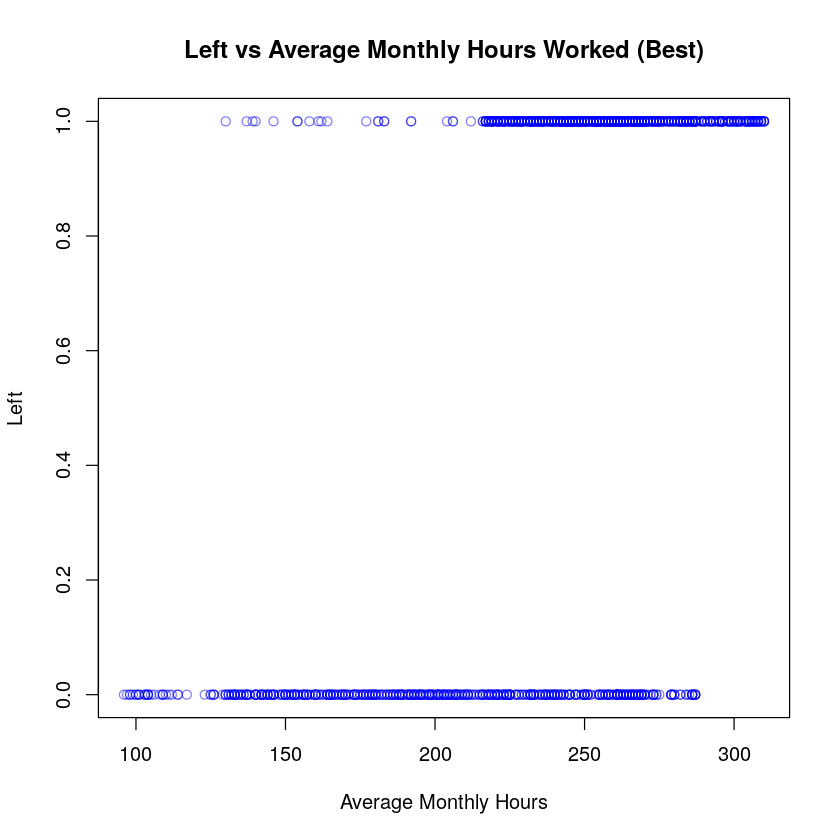

In [18]:
plot(HR_best_train$average_montly_hours,HR_best_train$left,main="Left vs Average Monthly Hours Worked (Best)", xlab="Average Monthly Hours",ylab="Left",col=rgb(0,0,1,0.5))

It is clear from this plot that the more hours they work on average, the more likely that the best and most experienced employees will leave.

Let's fit a logistic regression model to the data, and plot the resulting regression curve. This can be done using the built-in `glm` function, with the `family` argument set to `binomial`.


Call:
glm(formula = left ~ average_montly_hours, family = binomial, 
    data = HR_best_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2164  -0.6606   0.4235   0.7683   2.7022  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -8.585290   0.510710  -16.81   <2e-16 ***
average_montly_hours  0.038160   0.002137   17.86   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1977.4  on 1459  degrees of freedom
Residual deviance: 1384.7  on 1458  degrees of freedom
AIC: 1388.7

Number of Fisher Scoring iterations: 5


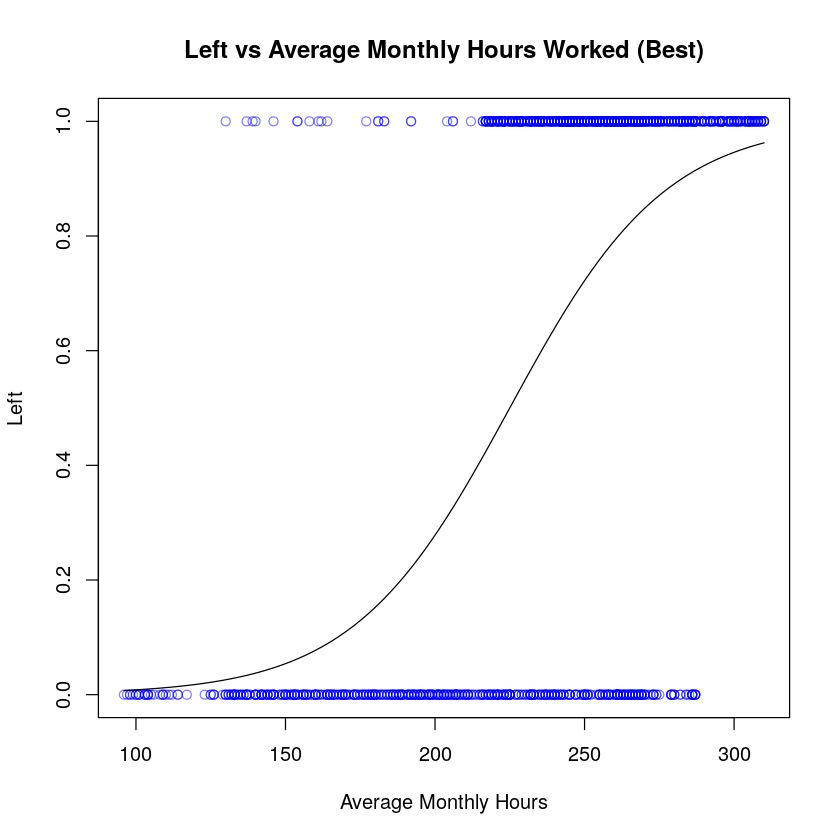

In [19]:
logfit<-glm(left~average_montly_hours,data=HR_best_train,family=binomial)
summary(logfit)
newamh<-seq(96,310)
predprobs<-predict(logfit,data.frame(average_montly_hours=newamh),type="response")
plot(HR_best_train$average_montly_hours,HR_best_train$left,main="Left vs Average Monthly Hours Worked (Best)", xlab="Average Monthly Hours",ylab="Left",col=rgb(0,0,1,0.5))
lines(newamh,predprobs,col="black",lty=1)

|<center>TASK</center>|
| ---- |
| What is the interpretation of the estimated coefficient for `average_montly_hours` ? |

---
**Solution**

The estimated coefficient of the logistic regression model for average_monthly_hours is 0.03595; this suggests that an increase in average monthly hours worked is associated with an increase in the probability of the employee leaving. For every 1 hour increase in average monthly hours worked, the log odds of leaving increase by 0.03595 units.

---

### Classification

We can use a threshold together with the regression curve to create two groups.  We can also observe the training error and test error we make.

Let's start with a threshold of 0.5.

In [20]:
HR_best_train$probs<-predict(logfit,data.frame(average_montly_hours=HR_best_train$average_montly_hours),type="response")
HR_best_train$predleft<-as.integer(HR_best_train$probs>=0.5)
table(HR_best_train$predleft,HR_best_train$left)

HR_best_test$probs<-predict(logfit,data.frame(average_montly_hours=HR_best_test$average_montly_hours),type="response")
HR_best_test$predleft<-as.integer(HR_best_test$probs>=0.5)
table(HR_best_test$predleft,HR_best_test$left)

   
      0   1
  0 388  82
  1 212 778

   
      0   1
  0 391  66
  1 233 771

|<center>TASK</center>|
| ---- |
| What are the (1) error rate, (2) sensitivity, (3) specificity, and (4) precision in Training and Testing for this classifier? |

---
**Solution**

Note that:
1 = "Positive" i.e. person left
0 = "Negative" i.e. person stayed

|	| 0	|1 |
|----|----|----|
|0	|TN	|FN|
|1	|FP	|TP|

error rate = (FP + FN)/(TP + FP + TN + FN)

sensitivity = TP/(TP + FN)

specificity = TN/(TN + FP)

precision = TP/(TP + FP)


|| error rate  |sensitivity	  |specificity |	precision|
|--|--|--|--|--|
|train |0.20	 |  0.90  | 0.65	  |      0.79|
|test |0.20	 |  0.92  | 0.63	 |      0.77 |

---

|<center>TASK</center>|
| ---- |
| Perform two fold cross-validation (CV) of the logistic regression classifier above on the training set. Report the cross-validation error (the average of the error rates on the two folds). |

---
**Solution**

In [21]:
set.seed(1)
N = dim(HR_best_train)[1]

idx = sample(1:N, floor(0.5*N), replace=FALSE)
HR_best_train1 = HR_best_train[idx,]
HR_best_train2 = HR_best_train[-idx,]

logfit_f1 <- glm(left~average_montly_hours, data=HR_best_train1,family=binomial)
logfit_f2 <- glm(left~average_montly_hours, data=HR_best_train2,family=binomial)

pred1 <-as.integer(predict(logfit_f2, HR_best_train1, type="response") >= 0.5)
pred2 <-as.integer(predict(logfit_f1, HR_best_train2, type="response") >= 0.5)

cat('2-fold CV error is ', 0.5*(mean(pred1 != HR_best_train1$left) + mean(pred2 != HR_best_train2$left)),'\n')

2-fold CV error is  0.2013699 


---

The quantities we computed above were just for a single choice of threshold.  We can gauge the tradeoff between true positive rates (sensitivity) and false positive rates (1-specificity) by trying all possible thresholds. This allows us to generate a plot of true positive rate against the false positive rate - a curve known the ROC (receiver operating characteristic) curve.

We'll do this now for both the training data, as well as computing the AUC (Area Under the Curve).

Loading required package: gplots


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




[1] 0.8248469

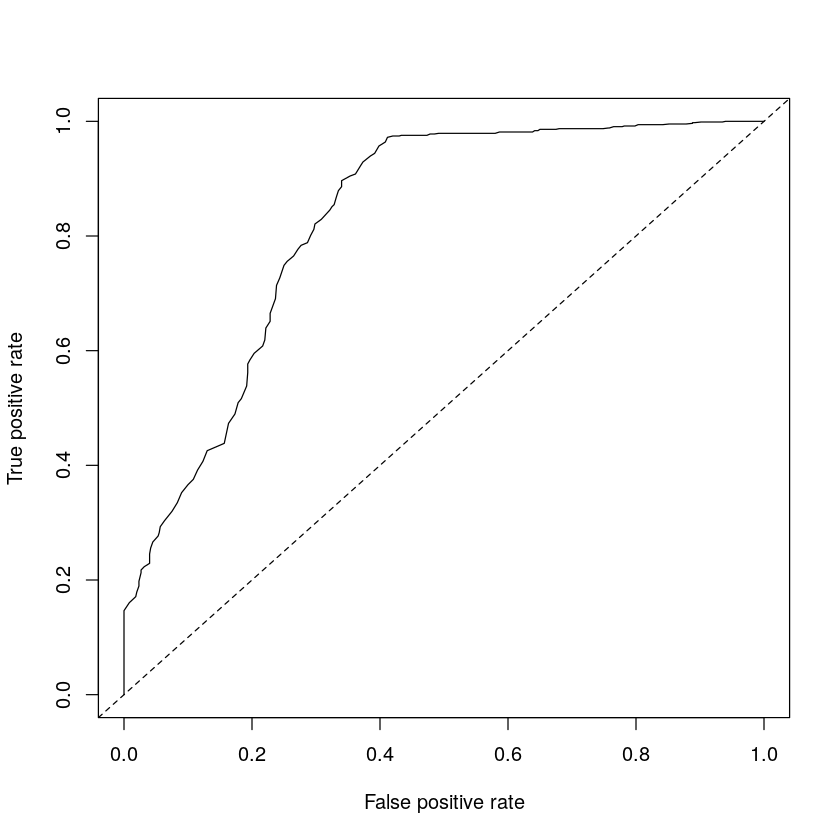

In [22]:
library("ROCR")
trainROC<-performance(prediction(HR_best_train$probs,HR_best_train$left),"tpr","fpr")
plot(trainROC)
abline(a=0, b= 1,lty=2)
trainAUC<-as.double(performance(prediction(HR_best_train$probs,HR_best_train$left),"auc")@y.values)
trainAUC

|<center>TASK</center>|
| ---- |
| Construct the ROC curve for the test data, and compute the AUC. |

---
**Solution**

[1] 0.8351226

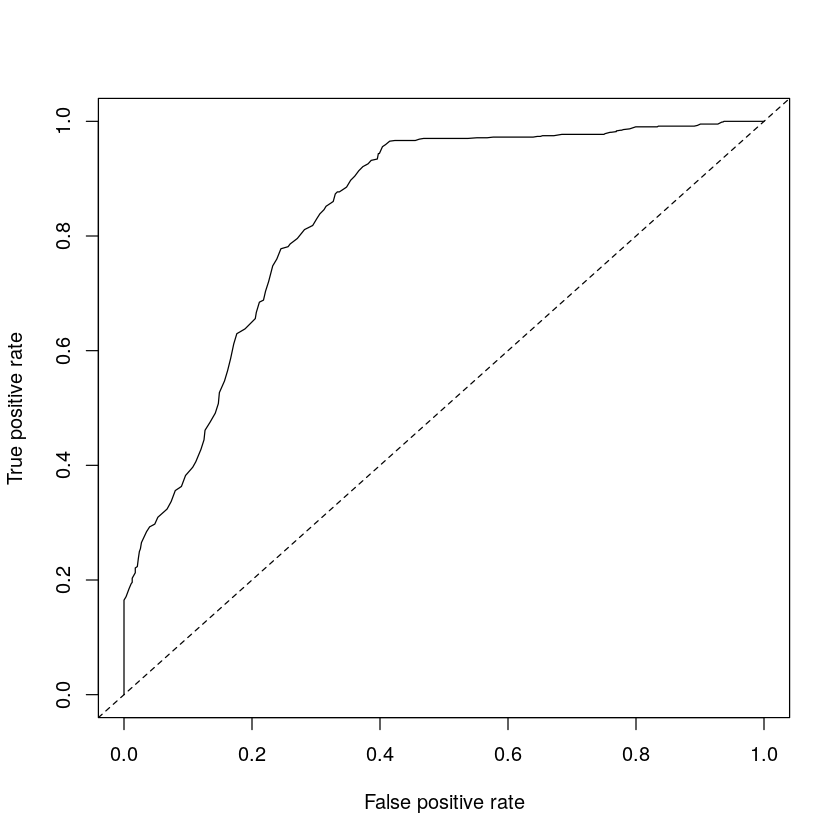

In [23]:
testROC <- performance(prediction(HR_best_test$probs,HR_best_test$left),'tpr','fpr')
plot(testROC)
abline(a=0, b=1, lty=2)
testAUC <- as.double(performance(prediction(HR_best_test$probs,HR_best_test$left), 'auc')@y.values)
testAUC

---

Of course, we have been ignoring all of the other predictors so far.

It is simple enough to modify the logistic regression to include others we have identified as important from Prac. 3.

Let's include satisfaction level, number of projects, and their interactions.

In [24]:
logfit2<-glm(left~average_montly_hours*satisfaction_level*number_project,data=HR_best_train,family=binomial)
summary(logfit2)


Call:
glm(formula = left ~ average_montly_hours * satisfaction_level * 
    number_project, family = binomial, data = HR_best_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.1465  -0.4459   0.1286   0.5885   2.9814  

Coefficients:
                                                         Estimate Std. Error
(Intercept)                                             11.273093   5.148588
average_montly_hours                                    -0.089523   0.022698
satisfaction_level                                     -12.899415   7.974543
number_project                                          -4.160457   1.126726
average_montly_hours:satisfaction_level                  0.082181   0.034837
average_montly_hours:number_project                      0.025123   0.004795
satisfaction_level:number_project                        2.753097   1.785305
average_montly_hours:satisfaction_level:number_project  -0.014731   0.007644
                                            

Whilst the interpretation of the estimated coefficients becomes trickier for this model, for this practical we're only interested in its classification performance.

Let's evaluate the training performance of the classifier associated with this more complicated logistic regression model.

[1] 0.9134322

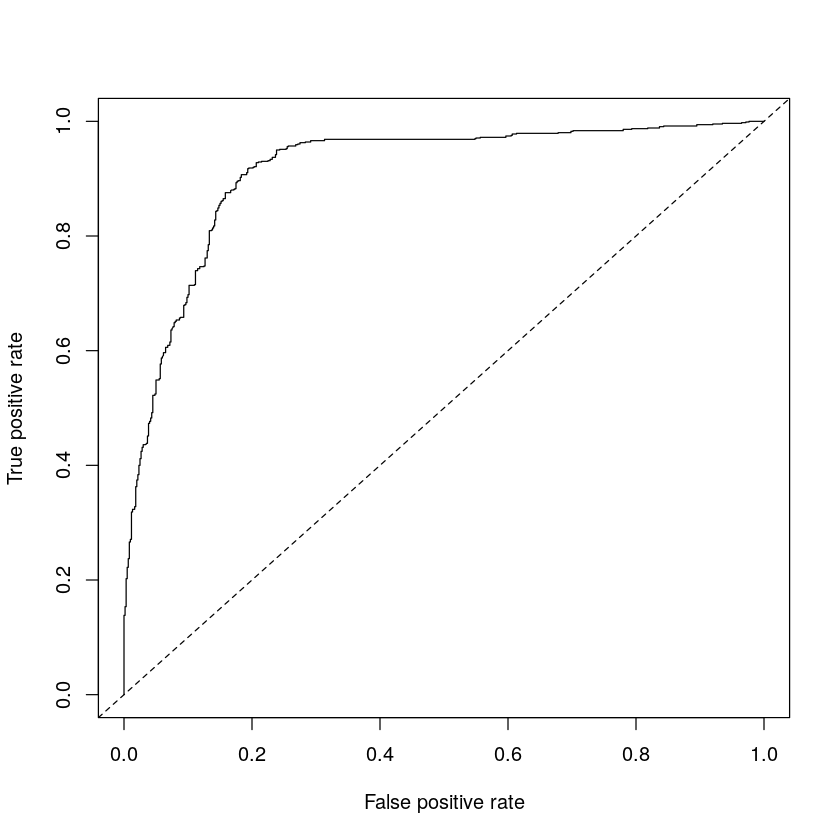

In [25]:
HR_best_train$probs2<-predict(logfit2,data.frame(average_montly_hours=HR_best_train$average_montly_hours,satisfaction_level=HR_best_train$satisfaction_level,number_project=HR_best_train$number_project),type="response")
trainROC2<-performance(prediction(HR_best_train$probs2,HR_best_train$left),"tpr","fpr")
plot(trainROC2)
abline(a=0, b= 1,lty=2)
trainAUC2<-as.double(performance(prediction(HR_best_train$probs2,HR_best_train$left),"auc")@y.values)
trainAUC2

Of course, the model fitted using more predictors produces a better classifier for the training data.

|<center>TASK</center>|
| ---- |
| Construct the ROC curve for the test data and compute the AUC for the new logistic regression model. What do you observe?  Comment on one potential pitfall associated with more complex models. |

---
**Solution**

[1] 0.9138148

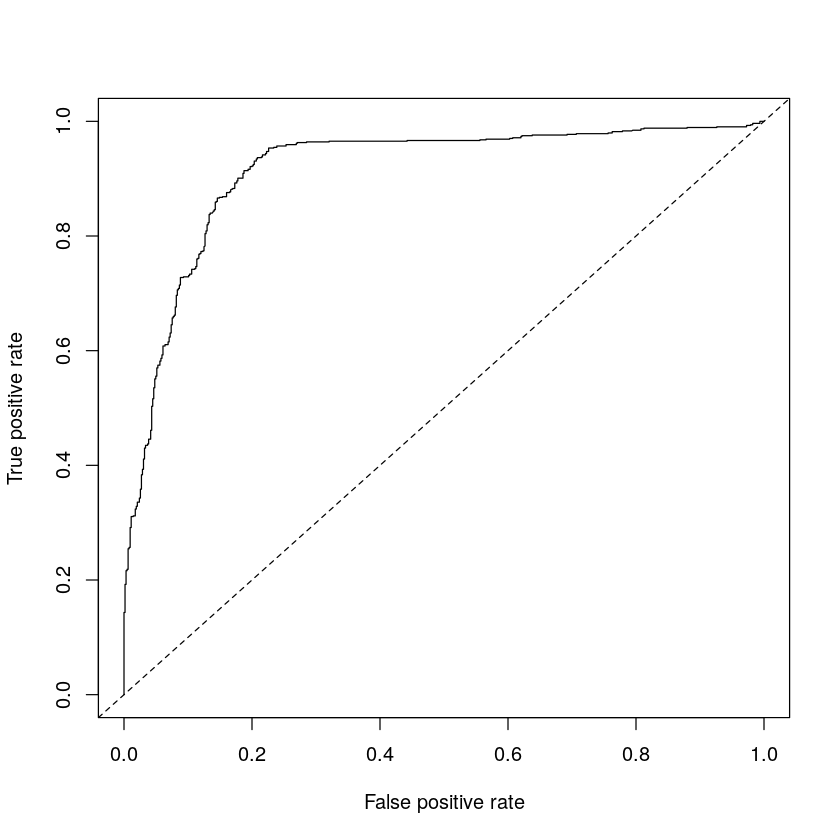

In [26]:
HR_best_test$probs2 <- predict(logfit2,data.frame(average_montly_hours=HR_best_test$average_montly_hours,satisfaction_level=HR_best_test$satisfaction_level,number_project=HR_best_test$number_project),type="response")
testROC2 <- performance(prediction(HR_best_test$probs2, HR_best_test$left), 'tpr', 'fpr')
plot(testROC2)
abline(a=0, b=1, lty=2)
testAUC2 <- as.double(performance(prediction(HR_best_test$probs2, HR_best_test$left), 'auc')@y.values)
testAUC2

The AUC for the new multiple logistic regression model for both the training and test sets showed a substantial increase for both models when compared to the logistic regression using only average monthly hours worked. For the training set, the AUC increased from 0.828 to 0.906, and for the test set it increased from 0.831 to 0.919. 

A potential pitfall of a more complex model is that it is usually less interpretable, which happens in this case. Note that while in general a more complex model is more likely to overfit, it doesn't happen in this example.

---

**Model selection.** Next task explores CV's ability to select a good model.

|<center>TASK</center>|
| ---- |
| Calculate the 2-fold CV error of the more complex logistic regression classifier on the training set. Use the same two folds as for the old classifier, and use 0.5 as the threshold too. Does two fold CV help to find the classifier with better test set performance? Explain your answer.|

---
**Solution**

In [27]:
logfit_f1 <- glm(left~average_montly_hours*satisfaction_level*number_project, data=HR_best_train1,family=binomial)
logfit_f2 <- glm(left~average_montly_hours*satisfaction_level*number_project, data=HR_best_train2,family=binomial)

pred1 <-as.integer(predict(logfit_f2, HR_best_train1, type="response") >= 0.5)
pred2 <-as.integer(predict(logfit_f1, HR_best_train2, type="response") >= 0.5)
pred <-as.integer(predict(logfit2, HR_best_test, type="response") >= 0.5)

cat('2-fold CV error is ', 0.5*(mean(pred1 != HR_best_train1$left) + mean(pred2 != HR_best_train2$left)),'\n')
cat('test set error is ', mean(pred != HR_best_test$left))

2-fold CV error is  0.139726 
test set error is  0.1300479

The more complex logistic regression classifier has smaller 2-fold CV error and test error than the simpler one. So 2-fold CV helps us to find the classifier with better test set performance in this case.

---

### Other Classification Techniques

It is relatively easy to carry out classification using other supervised learning techniques.

There are very well-written implementations of many other algorithms not discussed in this course, such as LDA (linear discriminative anaysis), QDA (quadratic discriminative analysis). Training and prediction using these models can generally be done using functions with similar structure as in previous examples, except that there may be algorithm specific parameters that we need to specify.

We illustrate how to construct an LDA-based classifier using the three predictors and their interactions we had before, and evaluate it on our test data.

[1] 0.9059245

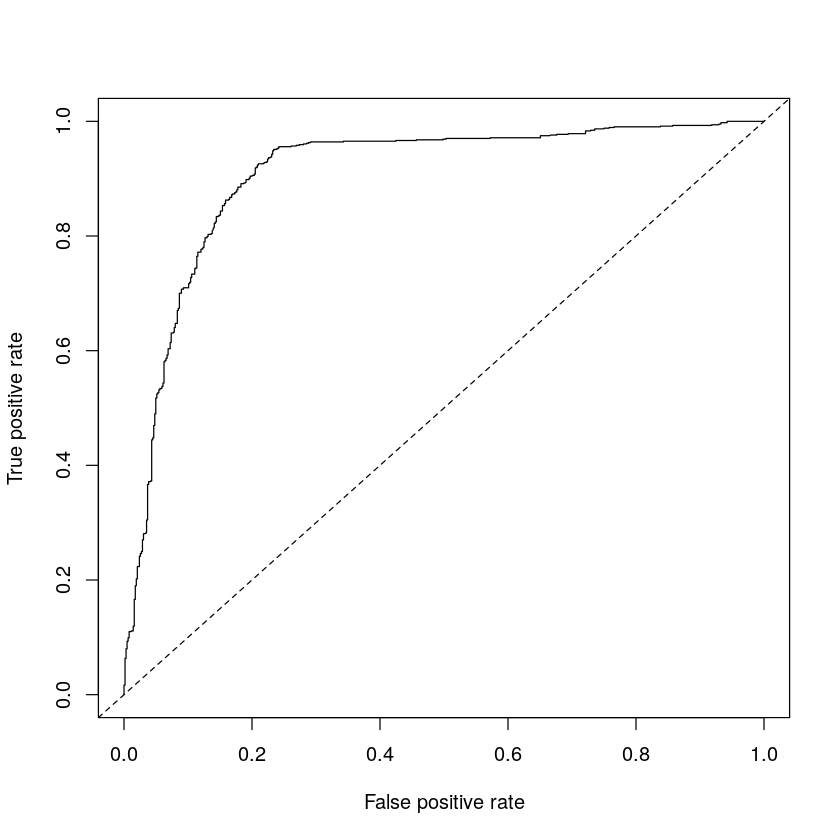

In [28]:
library("MASS")
ldafit<-lda(left~average_montly_hours*satisfaction_level*number_project,data=HR_best_train)
temp<-predict(ldafit,data.frame(average_montly_hours=HR_best_test$average_montly_hours,satisfaction_level=HR_best_test$satisfaction_level,number_project=HR_best_test$number_project),type="response")
HR_best_test$probs3<-temp$posterior[,2]
testROC3<-performance(prediction(HR_best_test$probs3,HR_best_test$left),"tpr","fpr")
plot(testROC3)
abline(a=0, b= 1,lty=2)
testAUC3<-as.double(performance(prediction(HR_best_test$probs3,HR_best_test$left),"auc")@y.values)
testAUC3

In addition to linear discriminant analysis, the `MASS` package has support for quadratic discriminant analysis via the command `qda`.  The `class` package has support for K nearest neighbours via `knn` and the `e1071` package has support for support vector machines via `svm`.

We've installed all of these packages for this practical.

|<center>TASK</center>|
| ---- |
| Choose **one** of the other classification techniques, train it to classify `left` from your training data, and test its performance on your test data.  Comment on how your classifier performs relative to the three simple classifiers we've explored in this part of the practical. |

---
**Solution**

[1] 0.923614

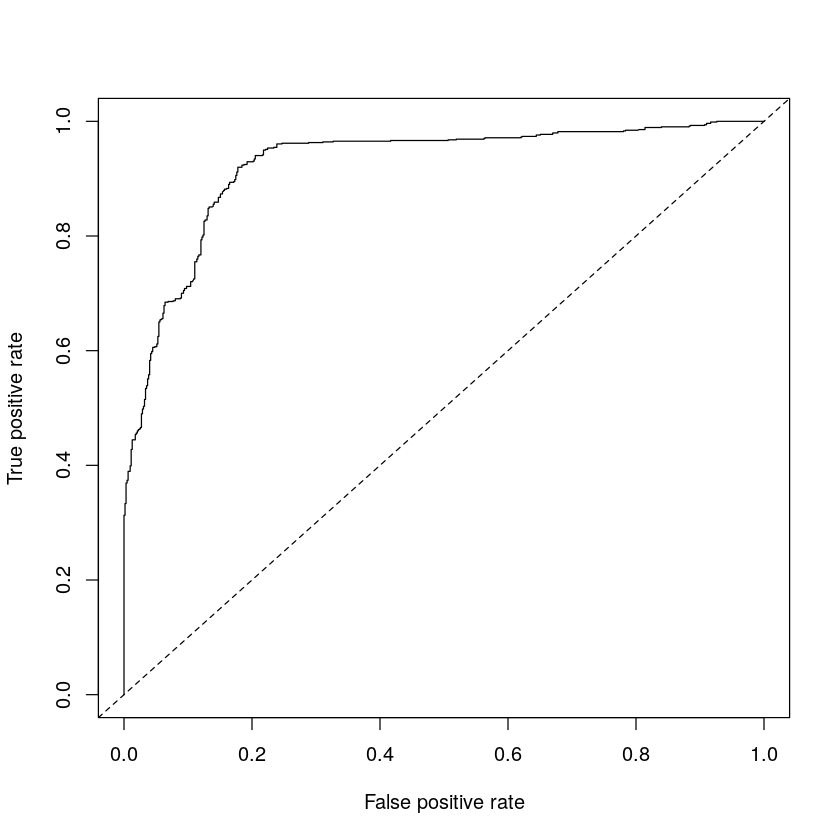

In [29]:
library("MASS") 
qdafit<-qda(left~average_montly_hours*satisfaction_level*number_project,data=HR_best_train) 
temp<-predict(qdafit,data.frame(average_montly_hours=HR_best_test$average_montly_hours,satisfaction_level=HR_best_test$satisfaction_level,number_project=HR_best_test$number_project), type="response") 
HR_best_test$probs4<-temp$posterior[,2] 
testROC4<-performance(prediction(HR_best_test$probs4,HR_best_test$left),"tpr","fpr") 
plot(testROC4) 
abline(a=0, b= 1,lty=2) 
testAUC4<-as.double(performance(prediction(HR_best_test$probs4,HR_best_test$left),"auc")@y.values) 
testAUC4

The area under the curve (AUC) is higher with the quadratic discriminant analysis (QDA) classifier indicating that it performs better than the other simple classifiers.

---

## Unsupervised Learning

As a final exercise, let's subset all of our employee data again (not only best) to only include those that have left.

In Prac. 3, we visually identified several *clusters* of leavers.  We will now use the k-means clustering algorithm to capture these clusters.

In [30]:
HR_left<-HR_comma_sep[HR_comma_sep$left==1,]
head(HR_left)

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.38,0.53,2,157,3,0,1,0,sales,low
0.80,0.86,5,262,6,0,1,0,sales,medium
0.11,0.88,7,272,4,0,1,0,sales,medium
0.72,0.87,5,223,5,0,1,0,sales,low
0.37,0.52,2,159,3,0,1,0,sales,low
0.41,0.50,2,153,3,0,1,0,sales,low


Now, let's focus on three variables: average monthly hours, satisfaction level, and last evaluation.

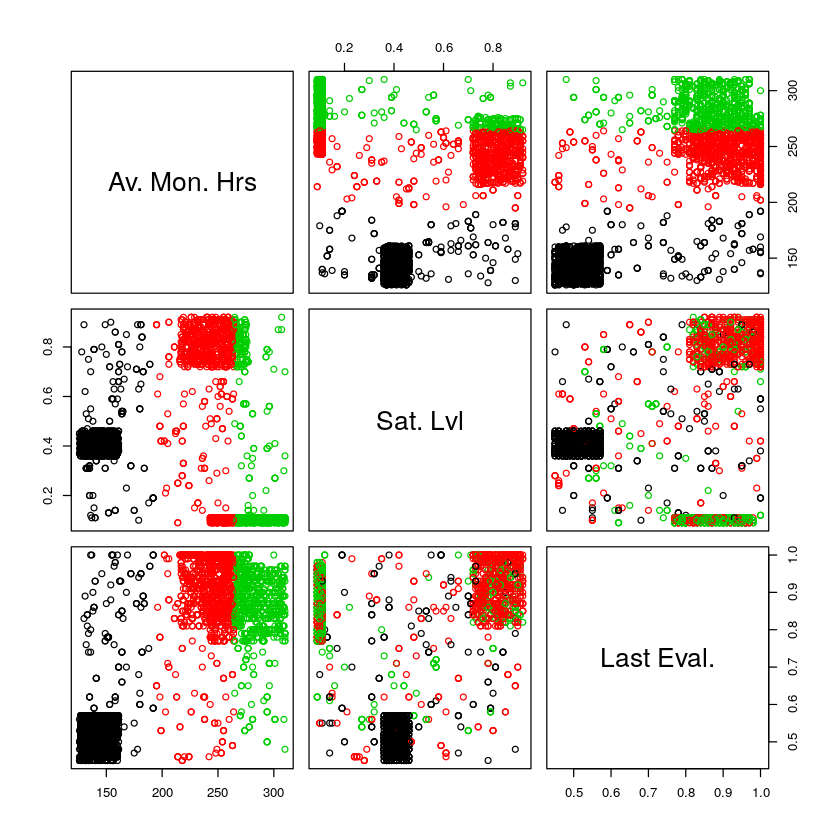

In [31]:
library("ggplot2") # Expanded plotting functionality over "lattice" package
x<-cbind(HR_left$average_montly_hours,HR_left$satisfaction_level,HR_left$last_evaluation)
kmfit<-kmeans(x,3,nstart=25) # Find the best 3 clusters using 25 random sets of (distinct) rows in x as initial centres.
pairs(x,col=(kmfit$cluster),labels=c("Av. Mon. Hrs","Sat. Lvl","Last Eval."))

One thing you will notice is that the three clusters that are found are not what we would expect.

This is because the variables are on different scales; since average monthly hours takes on values so much larger than  satisfaction level and last evaluation, the algorithm effectively prioritises just this variable.

A quick remedy to this problem is achieved by adjusting the scale of satisfaction level and last evaluation by a factor of 100.

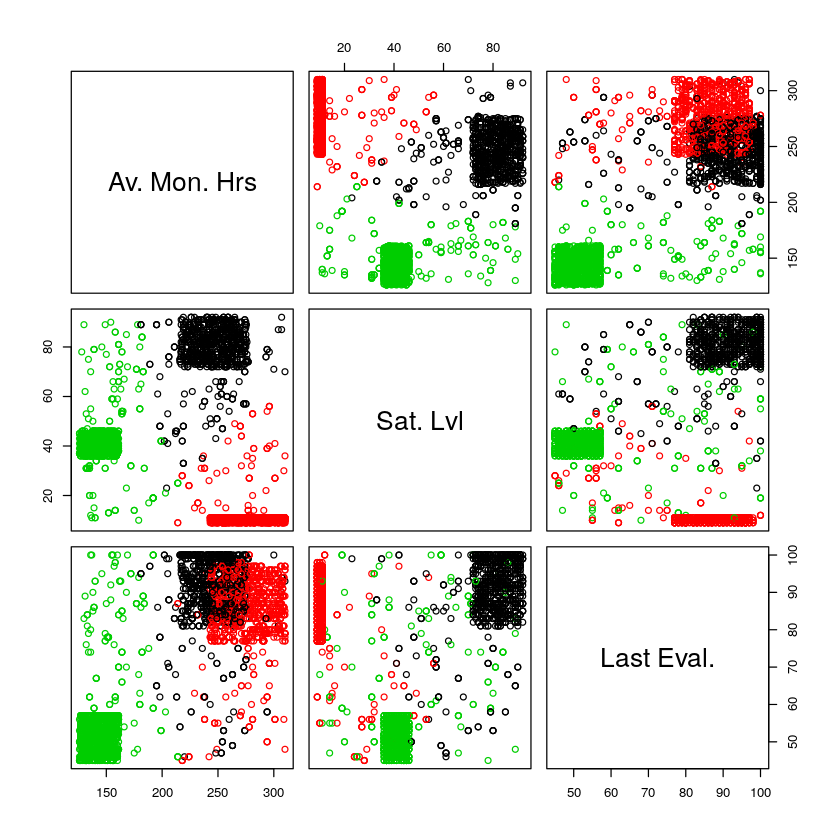

In [32]:
x<-cbind(HR_left$average_montly_hours,100*HR_left$satisfaction_level,100*HR_left$last_evaluation)
kmfit<-kmeans(x,3,nstart=25) # Find the best 3 clusters using 25 random restarts
pairs(x,col=(kmfit$cluster),labels=c("Av. Mon. Hrs","Sat. Lvl","Last Eval."))

|<center>TASK</center>|
| ---- |
| Partition the dataset into the three clusters we have just identified.  Use quantitative and visual EDA to explore the typical characteristics of each cluster.  Based on this, what is a possible explanation for the clusters? |

---
**Solution**

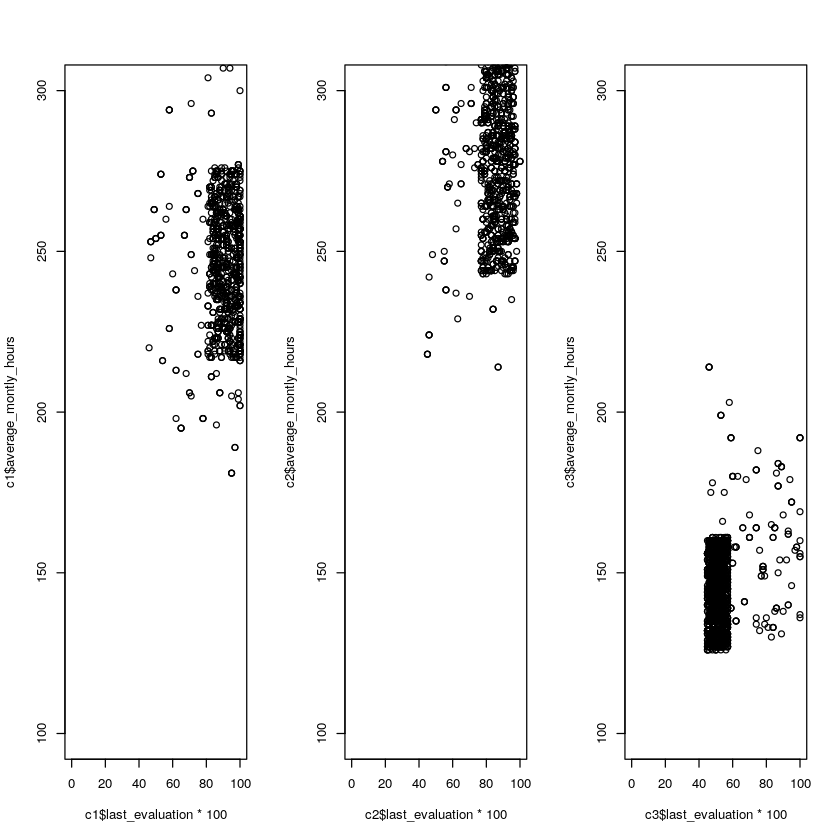

In [33]:
# Get the three clusters; these are three clusters for employees that have left
c1 <- subset(HR_left, kmfit$cluster == 1)
c2 <- subset(HR_left, kmfit$cluster == 2)
c3 <- subset(HR_left, kmfit$cluster == 3)

# Determine which cluster is which from the above pairs plot
par(mfrow=c(1,3))

plot(c1$last_evaluation*100,c1$average_montly_hours, xlim=c(0,100), ylim=c(100, 300))
plot(c2$last_evaluation*100,c2$average_montly_hours, xlim=c(0,100), ylim=c(100, 300))
plot(c3$last_evaluation*100,c3$average_montly_hours, xlim=c(0,100), ylim=c(100, 300))

So we know that from the previous plots, cluster 1 = black, cluster 2 = red, and cluster 3 = green.

In [34]:
# Cluster formatting to reference
color.c1 <- rgb(0, 0, 0, 0.8) # black
color.c2 <- rgb(1,0,0,0.8) # red
color.c3 <- rgb(36/255, 199/255, 24/255, 0.8) # green

# Summary of each cluster
summary(c1)
summary(c2)
summary(c3)

 satisfaction_level last_evaluation  number_project average_montly_hours
 Min.   :0.2300     Min.   :0.4600   Min.   :2.00   Min.   :181.0       
 1st Qu.:0.7600     1st Qu.:0.8600   1st Qu.:4.00   1st Qu.:232.0       
 Median :0.8150     Median :0.9200   Median :5.00   Median :246.0       
 Mean   :0.7987     Mean   :0.9037   Mean   :4.51   Mean   :245.7       
 3rd Qu.:0.8700     3rd Qu.:0.9800   3rd Qu.:5.00   3rd Qu.:260.0       
 Max.   :0.9200     Max.   :1.0000   Max.   :7.00   Max.   :310.0       
 time_spend_company Work_accident         left   promotion_last_5years
 Min.   :2.000      Min.   :0.0000   Min.   :1   Min.   :0.000000     
 1st Qu.:5.000      1st Qu.:0.0000   1st Qu.:1   1st Qu.:0.000000     
 Median :5.000      Median :0.0000   Median :1   Median :0.000000     
 Mean   :5.041      Mean   :0.0502   Mean   :1   Mean   :0.001025     
 3rd Qu.:5.000      3rd Qu.:0.0000   3rd Qu.:1   3rd Qu.:0.000000     
 Max.   :6.000      Max.   :1.0000   Max.   :1   Max.   :1.0000

 satisfaction_level last_evaluation  number_project  average_montly_hours
 Min.   :0.0900     Min.   :0.4500   Min.   :2.000   Min.   :214.0       
 1st Qu.:0.1000     1st Qu.:0.8100   1st Qu.:6.000   1st Qu.:259.0       
 Median :0.1000     Median :0.8700   Median :6.000   Median :278.0       
 Mean   :0.1159     Mean   :0.8552   Mean   :6.089   Mean   :276.5       
 3rd Qu.:0.1100     3rd Qu.:0.9200   3rd Qu.:7.000   3rd Qu.:293.0       
 Max.   :0.5600     Max.   :1.0000   Max.   :7.000   Max.   :310.0       
 time_spend_company Work_accident         left   promotion_last_5years
 Min.   :2.000      Min.   :0.0000   Min.   :1   Min.   :0.000000     
 1st Qu.:4.000      1st Qu.:0.0000   1st Qu.:1   1st Qu.:0.000000     
 Median :4.000      Median :0.0000   Median :1   Median :0.000000     
 Mean   :4.072      Mean   :0.0443   Mean   :1   Mean   :0.003165     
 3rd Qu.:4.000      3rd Qu.:0.0000   3rd Qu.:1   3rd Qu.:0.000000     
 Max.   :6.000      Max.   :1.0000   Max.   :1   Max.   

 satisfaction_level last_evaluation  number_project  average_montly_hours
 Min.   :0.1000     Min.   :0.4500   Min.   :2.000   Min.   :126         
 1st Qu.:0.3800     1st Qu.:0.4800   1st Qu.:2.000   1st Qu.:135         
 Median :0.4100     Median :0.5100   Median :2.000   Median :145         
 Mean   :0.4143     Mean   :0.5292   Mean   :2.182   Mean   :145         
 3rd Qu.:0.4400     3rd Qu.:0.5500   3rd Qu.:2.000   3rd Qu.:154         
 Max.   :0.9000     Max.   :1.0000   Max.   :7.000   Max.   :214         
 time_spend_company Work_accident          left   promotion_last_5years
 Min.   :2.000      Min.   :0.00000   Min.   :1   Min.   :0.000000     
 1st Qu.:3.000      1st Qu.:0.00000   1st Qu.:1   1st Qu.:0.000000     
 Median :3.000      Median :0.00000   Median :1   Median :0.000000     
 Mean   :3.074      Mean   :0.04736   Mean   :1   Mean   :0.009107     
 3rd Qu.:3.000      3rd Qu.:0.00000   3rd Qu.:1   3rd Qu.:0.000000     
 Max.   :6.000      Max.   :1.00000   Max.   :1   

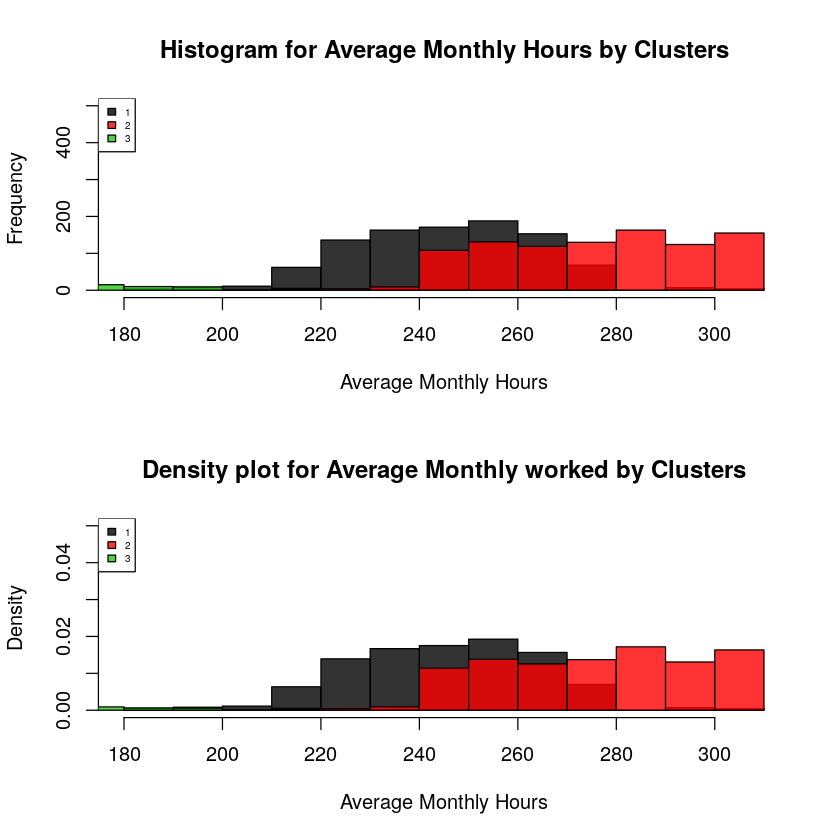

In [35]:
# Create multiple figure
par(mfrow=c(2,1))

# Histogram - frequency
hist(c1$average_montly_hours, col=color.c1,freq=T, main='Histogram for Average Monthly Hours by Clusters',
    xlab='Average Monthly Hours', ylim=c(0,500))
hist(c2$average_montly_hours, col=color.c2,freq=T, add=TRUE)
hist(c3$average_montly_hours, col=color.c3, freq=T, add=TRUE)
legend('topleft', c('1', '2', '3'), fill=c(color.c1, color.c2, color.c3), cex=0.5)

# Histogram - density
hist(c1$average_montly_hours, col=color.c1,freq=FALSE, main='Density plot for Average Monthly worked by Clusters',
    xlab='Average Monthly Hours', ylim=c(0,0.05))
hist(c2$average_montly_hours, col=color.c2,freq=FALSE, add=TRUE)
hist(c3$average_montly_hours, col=color.c3, freq=FALSE, add=TRUE)
legend('topleft', c('1', '2', '3'), fill=c(color.c1, color.c2, color.c3), cex=0.5)

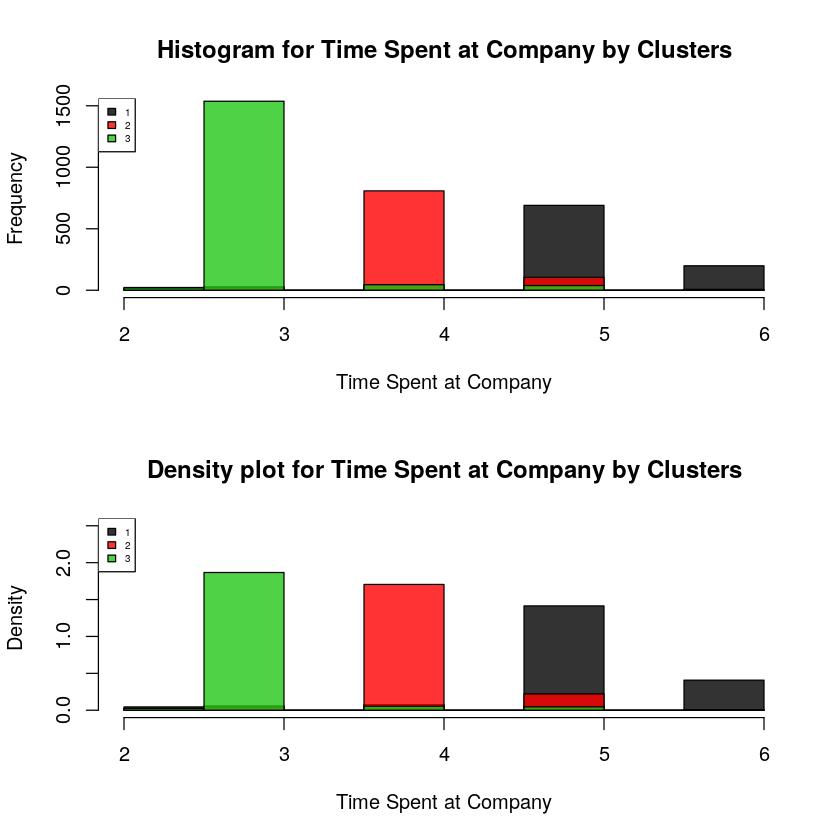

In [36]:
# Create multiple figure
par(mfrow=c(2,1))

# Histogram - frequency
hist(c1$time_spend_company, col=color.c1,freq=T, main='Histogram for Time Spent at Company by Clusters',
    xlab='Time Spent at Company', ylim=c(0,1500))
hist(c2$time_spend_company, col=color.c2,freq=T, add=TRUE)
hist(c3$time_spend_company, col=color.c3, freq=T, add=TRUE)
legend('topleft', c('1', '2', '3'), fill=c(color.c1, color.c2, color.c3), cex=0.5)

# Histogram - density
hist(c1$time_spend_company, col=color.c1,freq=FALSE, main='Density plot for Time Spent at Company by Clusters',
    xlab='Time Spent at Company', ylim=c(0,2.5))
hist(c2$time_spend_company, col=color.c2,freq=FALSE, add=TRUE)
hist(c3$time_spend_company, col=color.c3, freq=FALSE, add=TRUE)
legend('topleft', c('1', '2', '3'), fill=c(color.c1, color.c2, color.c3), cex=0.5)

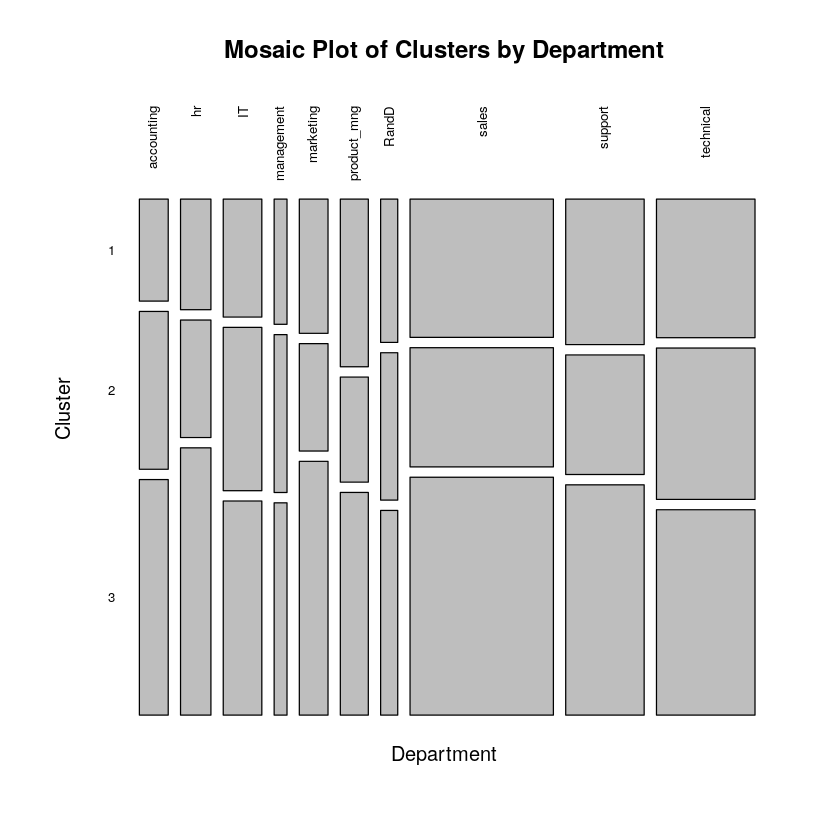

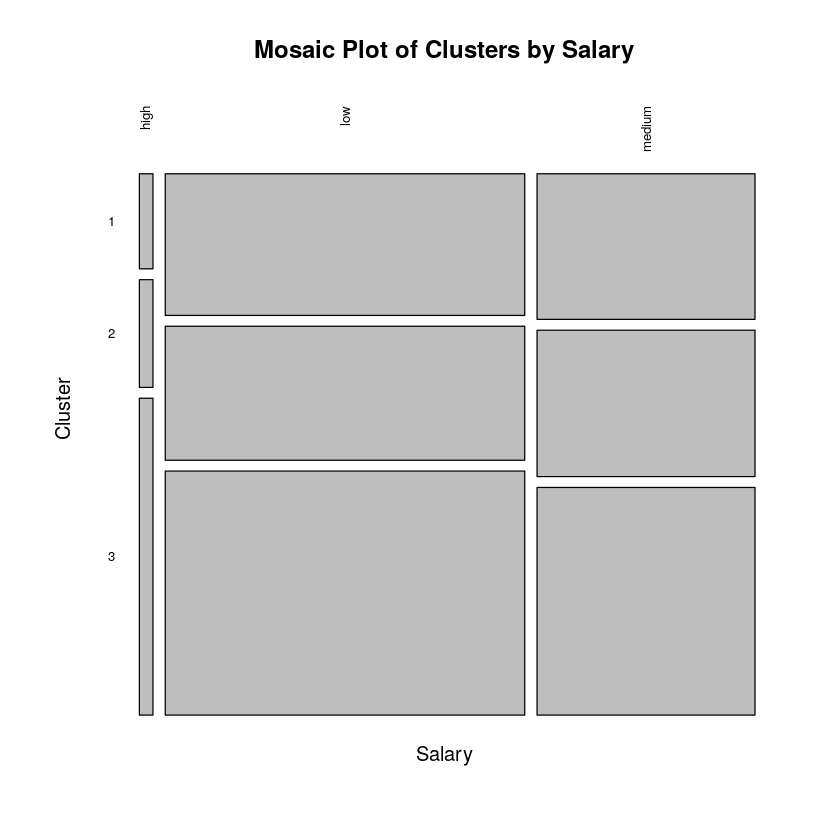

In [37]:
cluster_table_sales <- table(HR_left$sales, kmfit$cluster)
mosaicplot(cluster_table_sales, las=2, main='Mosaic Plot of Clusters by Department', xlab='Department', ylab='Cluster')

cluster_table_salary <- table(HR_left$salary, kmfit$cluster)
mosaicplot(cluster_table_salary, las=2, main='Mosaic Plot of Clusters by Salary', xlab='Salary', ylab='Cluster')

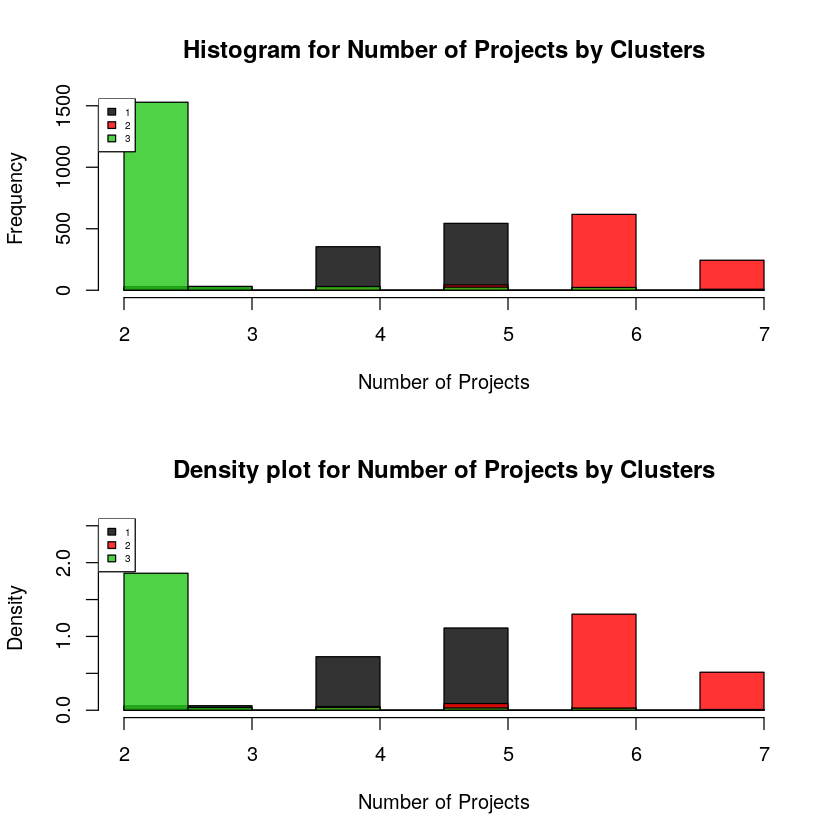

In [38]:
# Create multiple figure
par(mfrow=c(2,1))

# Histogram - frequency
hist(c1$number_project, col=color.c1,freq=T, main='Histogram for Number of Projects by Clusters',
    xlab='Number of Projects', ylim=c(0,1500))
hist(c2$number_project, col=color.c2,freq=T, add=TRUE)
hist(c3$number_project, col=color.c3, freq=T, add=TRUE)
legend('topleft', c('1', '2', '3'), fill=c(color.c1, color.c2, color.c3), cex=0.5)

# Histogram - density
hist(c1$number_project, col=color.c1,freq=FALSE, main='Density plot for Number of Projects by Clusters',
    xlab='Number of Projects', ylim=c(0,2.5))
hist(c2$number_project, col=color.c2,freq=FALSE, add=TRUE)
hist(c3$number_project, col=color.c3, freq=FALSE, add=TRUE)
legend('topleft', c('1', '2', '3'), fill=c(color.c1, color.c2, color.c3), cex=0.5)

After EDA on each cluster from the k-means clustering for employees who have left, we can see some clear characteristics for the three clusters. From the summaries, next to nobody received a promotion and there doesn't seem to be anything significant in work accidents. The mosaic plot of the clusters by department doesn't show any trends between work type. The mosaic for salary shows that a reasonable proportion of works that left were 'low' salary earners but there is no clear trend between clusters.

Looking at each cluster:

**Cluster 1:**
The pairs plot characterised this cluster as working low average monthly hours of employees who left (though from Prac 3, we see these hours are about the mean across all employees whether they stayed or left), middle satisfaction range and a low last evaluation. The histograms and summary show they've spent 3 years at the company and completed 2 projects. I think that these employees were let go by the company given their low last evaluation. This is also supported by 3 years at the company and 2 projects being a good time span and proof of work to decide if they're up to standard and make a decision on whether to keep them on or not. 

**Cluster 2:**
From the pairs plot, this cluster is characterised by high monthly hours, very low satisfaction and high evaluation. The histograms and summary show they've been at the company for 4 years and completed 6-7 projects. I think that these employees left because they were over-worked and unsatisfied. They worked long hours and had completed a lot of projects. They had high evaluations but may have not felt the company had not adequately recognised their skills and contribution. A promotion may have incentivised them to stay. I think with their high performance in evaluation and projects completed, they may be able to leverage their performance in seeking a better job.

**Cluster 3:**
From the pairs plot, this cluster is characterised by high monthly hours, high satisfaction and high evaluation. The histograms and summary show they've been at the company for 5+ years and completed 4-5 projects. It is not completely clear why an employee in this cluster may have left, but I think a strong explanation could be a very good offer from another company. They may have also wanted a change in workplace after being there for the longest time out of all the clusters. Again, a promotion may have incentivised them to stay.  

It would be interesting to have age as a parameter in this dataset. I think this would be additionally help and a strong indicator for classifying employees that have left. i.e. millennial job hopper, close to retirement etc... As a proxy, salary could potentially be used, with low salaray indicating a younger employee and high salary and older employee, but there is no clear trend in employees that have left by salary. 

---